---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [ ]:
_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [21]:
def answer_one():
   
    data = pd.read_csv('assets/fraud_data.csv')
    result = len(data[data.Class == 1])/len(data)
    
    return result
answer_one()    


0.016410823768035772

In [ ]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [22]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)

    return accuracy_score(y_test, y_dummy_predictions), recall_score(y_test, y_dummy_predictions)
answer_two()
 

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [1]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    acc_score = svm.score(X_test, y_test)
    rec_score = recall_score(y_test, y_pred)
    prec_score = precision_score(y_test, y_pred)
    
    return acc_score, rec_score, prec_score

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [2]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    THRESHOLD = -220.0
    params = {'C': 1e9, 'gamma': 1e-07}
    y_score = SVC(**params).fit(X_train, y_train).decision_function(X_test)
    y_score_adj = np.zeros_like(y_score)
    y_score_adj[np.where(y_score >= THRESHOLD)] = 1
       
    confusion = confusion_matrix(y_test, y_score_adj)
    
    return confusion

answer_four()

NameError: name 'X_train' is not defined

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [51]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve

    lr = LogisticRegression().fit(X_train, y_train)
    
    y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
        
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero_p = np.argmin(np.abs(precision-0.75))
    closest_zero_r = recall[closest_zero_p]
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    
    closest_zero_fpr_lr = np.argmin(np.abs(fpr_lr - 0.16))
    closest_zero_tpr_lr = recall[closest_zero_fpr_lr]


    ans = (closest_zero_r, closest_zero_tpr_lr)
    
    return ans
answer_five()

(0.825, 0.9875)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [68]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # create a Logistic Regression classifier
    logreg = LogisticRegression(solver='liblinear')

    # create a dictionary of hyperparameters to search
    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}

    # create a grid search object
    grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='recall')

    # fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # extract the mean test scores for each parameter combination
    mean_test_scores = grid_search.cv_results_['mean_test_score']

    # reshape the mean test scores into a 4 by 2 array
    mean_test_scores = mean_test_scores.reshape(4, 2)

    #ans = np.array(grid_lr.cv_results_['mean_test_score'].reshape(4,2))
 
    return mean_test_scores

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ]])

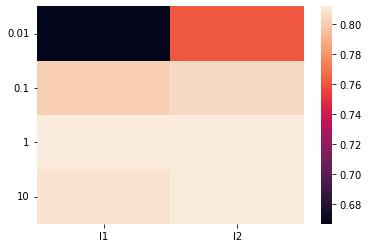

In [70]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    #%matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

    
GridSearch_Heatmap(answer_six())